C:\Users\oscarandres.pinilla\AppData\Local\Temp\ipykernel_20472\3450910702.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscarandres.pinilla\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscarandres.pinilla\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!


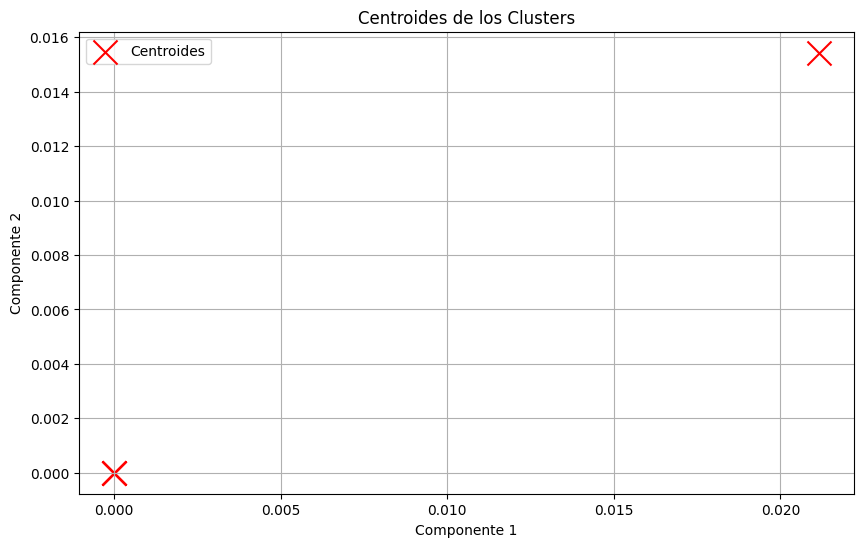

In [2]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

df_ref = pd.read_csv('df_ref.csv')  

primer_articulo = df_ref['article'][0]
primer_resumen = df_ref['abstract'][0]

oraciones = sent_tokenize(primer_articulo)

stop_words = set(stopwords.words('english'))
palabras = [word.lower() for sentence in oraciones for word in word_tokenize(sentence) if word.isalnum() and word.lower() not in stop_words]

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(oraciones)

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_matrix)

centroides = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(centroides[:, 0], centroides[:, 1], marker='x', color='red', s=300, label='Centroides')
plt.title('Centroides de los Clusters')
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.legend()
plt.grid(True)
plt.show()

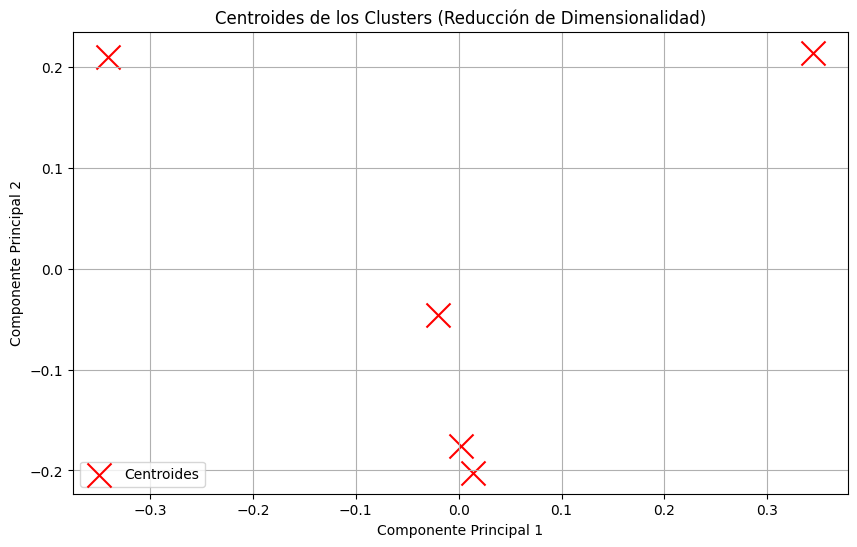

In [2]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
centroides_reducidos = pca.fit_transform(centroides)


plt.figure(figsize=(10, 6))
plt.scatter(centroides_reducidos[:, 0], centroides_reducidos[:, 1], marker='x', color='red', s=300, label='Centroides')
plt.title('Centroides de los Clusters (Reducción de Dimensionalidad)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

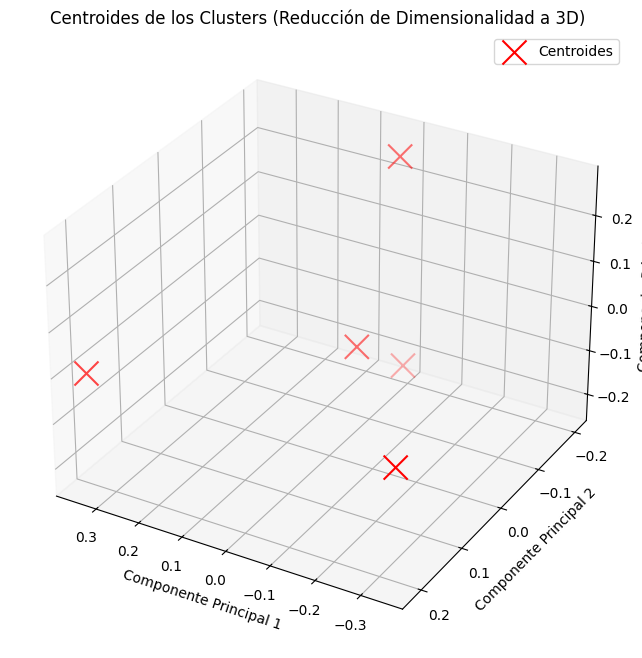

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

pca_3d = PCA(n_components=3)
centroides_reducidos_3d = pca_3d.fit_transform(centroides)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = centroides_reducidos_3d[:, 0]
y = centroides_reducidos_3d[:, 1]
z = centroides_reducidos_3d[:, 2]

ax.scatter(x, y, z, c='r', marker='x', s=300, label='Centroides')

ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

ax.set_title('Centroides de los Clusters (Reducción de Dimensionalidad a 3D)')

ax.legend()

ax.view_init(30, 120)

plt.show()


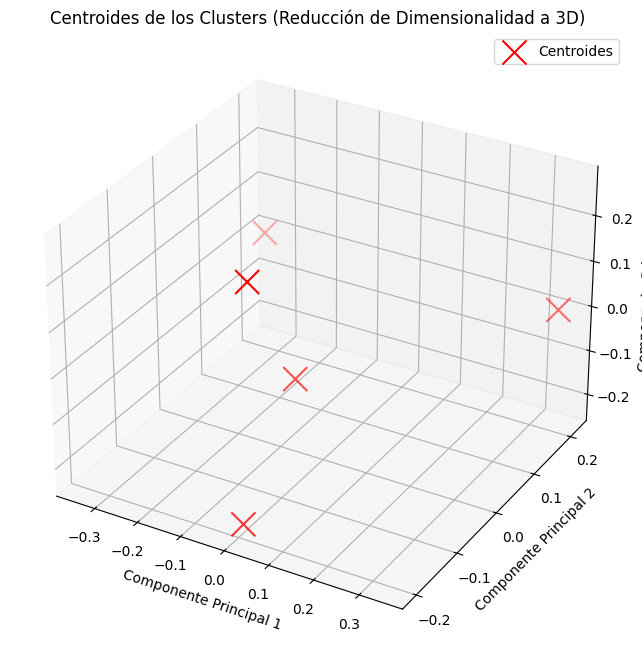

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


pca_3d = PCA(n_components=3)
centroides_reducidos_3d = pca_3d.fit_transform(centroides)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


x = centroides_reducidos_3d[:, 0]
y = centroides_reducidos_3d[:, 1]
z = centroides_reducidos_3d[:, 2]


ax.scatter(x, y, z, c='r', marker='x', s=300, label='Centroides')


ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')


ax.set_title('Centroides de los Clusters (Reducción de Dimensionalidad a 3D)')


ax.legend()

plt.show()


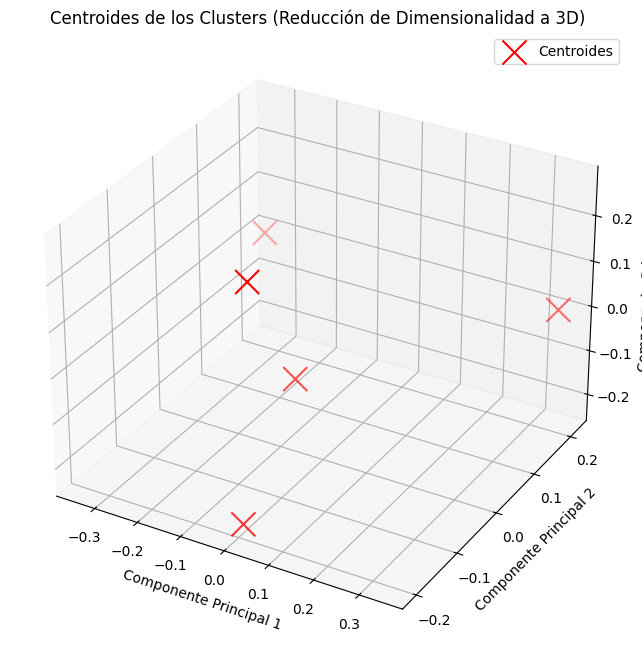

In [6]:

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter3D(x, y, z, c='r', marker='x', s=300, label='Centroides')


ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')


ax.set_title('Centroides de los Clusters (Reducción de Dimensionalidad a 3D)')


ax.legend()

plt.show()


In [8]:
import plotly.graph_objects as go

# Crear la figura
fig = go.Figure()

# Agregar los centroides como puntos en el gráfico tridimensional
fig.add_trace(go.Scatter3d(x=x, y=y, z=z, mode='markers', marker=dict(size=12, color='red', symbol='cross'), name='Centroides'))

# Configuración del diseño del gráfico
fig.update_layout(scene=dict(xaxis_title='CP 1',
                             yaxis_title='CP 2',
                             zaxis_title='CP 3'),
                  title='Centroides de los Clusters (Reducción de Dimensionalidad a 3D)')

# Mostrar el gráfico
fig.show()


In [4]:
import numpy as np

etiquetas_clusters = kmeans.labels_

distancias_a_centroides = kmeans.transform(tfidf_matrix)

distancias_promedio = []
for i in range(kmeans.n_clusters):
    distancias_promedio.append(np.mean(distancias_a_centroides[etiquetas_clusters == i, i]))

clusters_ordenados = np.argsort(distancias_promedio)

longitud_resumen = 5

resumen_indices = []
for cluster in clusters_ordenados[:longitud_resumen]:
    oraciones_cluster = np.where(etiquetas_clusters == cluster)[0]
    oracion_mas_representativa = oraciones_cluster[np.argmin(distancias_a_centroides[oraciones_cluster, cluster])]
    resumen_indices.append(oracion_mas_representativa)

resumen_indices = sorted(resumen_indices)
print("Resumen:")
for indice in resumen_indices:
    print(oraciones[indice])


Resumen:
further , autoimmune disorders such as vasculitis , in particular granulomatous angiitis , have been described as complications in patients with hodgkin 's lymphoma .
to et al .
possible causes of pdc are circulating anti - tr and anti - mglur1 antibodies destroying purkinje cells in the cerebellum and leading to severe symptoms in particular ataxia [ 6 , 7 ] .
our patient had several of these symptoms such as nausea , vomiting and vertigo , but no focal loss of neurological function was found on clinical examination .
.
